In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

In [2]:
# get energy production data
start_date = '2020-01-01'
end_date = '2021-01-01'

production = uretim.gerceklesen(start_date, end_date)

In [3]:
production.head(3)

,Tarih,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
0,2020-01-01,0,6166.40,3761.62,5780.09,1545.26,7302.54,770.50,0.0,35.5,1157.82,293.65,572.31,396.65,0,0,278.0,28060.34
1,2020-01-01,1,5161.03,3079.97,5792.66,1548.51,7286.46,776.18,0.0,35.8,1164.57,273.78,575.65,392.46,0,0,394.0,26481.07
2,2020-01-01,2,5149.52,2160.79,5755.22,1460.39,7281.67,787.75,0.0,36.3,1167.74,273.78,585.67,390.22,0,0,172.0,25221.05


In [5]:
production.describe()

,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
count,8808.00000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.0,8808.0,8808.000000,8808.000000
mean,11.50000,7746.026504,6515.794933,4303.827785,2331.419566,7111.608642,2788.028970,47.980268,35.631681,1061.087693,252.972661,431.470344,463.165296,0.0,0.0,-62.418569,33026.595775
std,6.92258,3952.323549,3171.403680,622.512318,1448.579504,1716.678584,1608.350955,66.317553,3.309019,105.220071,79.484606,158.347459,36.506329,0.0,0.0,315.830842,5495.008940
min,0.00000,496.660000,366.190000,2189.100000,419.440000,992.650000,139.760000,0.000000,0.000000,663.530000,48.570000,167.240000,369.680000,0.0,0.0,-1949.250000,15246.640000
25%,5.75000,3980.625000,3902.125000,3921.495000,1090.195000,6708.195000,1370.720000,0.000000,34.200000,993.385000,211.960000,272.177500,439.615000,0.0,0.0,-313.360000,29067.472500
50%,11.50000,8929.805000,6796.245000,4305.005000,1809.795000,7656.220000,2588.285000,2.670000,36.400000,1089.000000,242.880000,438.840000,458.440000,0.0,0.0,-85.000000,32908.105000
75%,17.25000,11058.337500,9052.125000,4732.692500,3552.550000,8340.122500,4092.695000,93.282500,37.800000,1141.867500,333.390000,598.862500,480.445000,0.0,0.0,182.000000,37484.857500
max,23.00000,14615.630000,15891.780000,6149.070000,5744.500000,8790.980000,6861.040000,297.990000,43.600000,1255.580000,362.100000,692.620000,596.090000,0.0,0.0,789.000000,45210.030000


In [6]:
production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8808 entries, 0 to 8807
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tarih           8808 non-null   datetime64[ns]
 1   Saat            8808 non-null   int64         
 2   Doğalgaz        8808 non-null   float64       
 3   Barajlı         8808 non-null   float64       
 4   Linyit          8808 non-null   float64       
 5   Akarsu          8808 non-null   float64       
 6   İthal Kömür     8808 non-null   float64       
 7   Rüzgar          8808 non-null   float64       
 8   Güneş           8808 non-null   float64       
 9   Fuel Oil        8808 non-null   float64       
 10  Jeo Termal      8808 non-null   float64       
 11  Asfaltit Kömür  8808 non-null   float64       
 12  Taş Kömür       8808 non-null   float64       
 13  Biyokütle       8808 non-null   float64       
 14  Nafta           8808 non-null   int64         
 15  LNG      

In [56]:
unrenewable_type = ['Doğalgaz', 'İthal Kömür']
X = production[unrenewable_type]
y = production[['Toplam']]

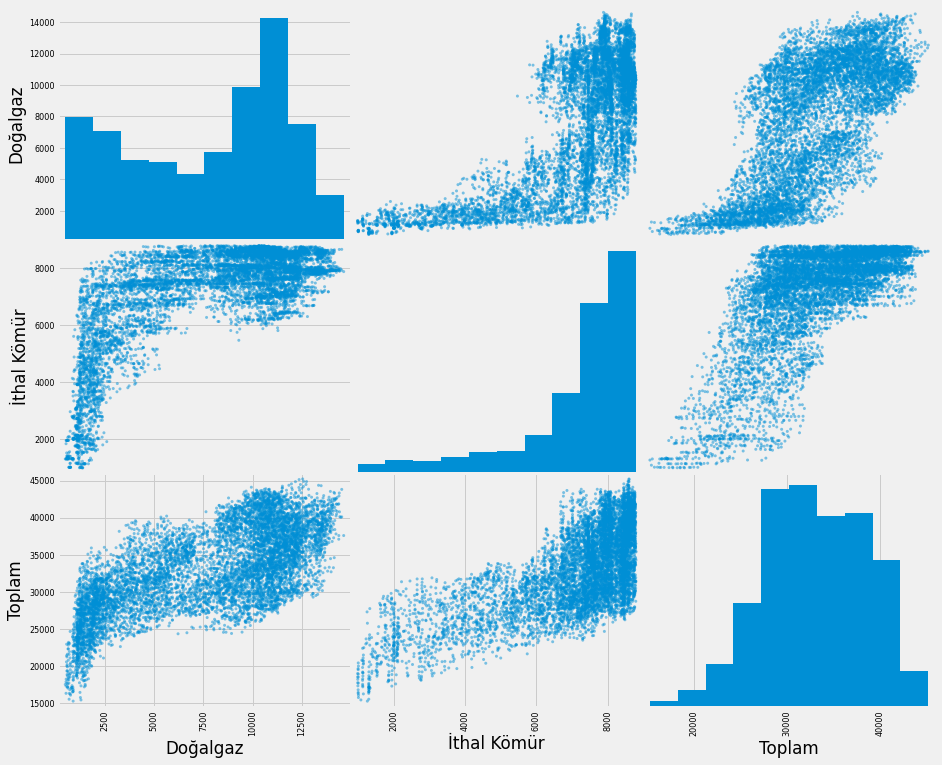

In [73]:
pd.plotting.scatter_matrix(production[['Doğalgaz', 'İthal Kömür', 'Toplam']], figsize = (14,12))
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [59]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
print('regression intercept: \n', regressor.intercept_)
print('regression coef.: \n', regressor.coef_)

regression intercept: 
 [19963.15447231]
regression coef.: 
 [[0.59090552 1.19248817]]


In [61]:
y_pred = regressor.predict(X_test)

In [62]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R2 score: ', r2_score(y_test, y_pred))

Mean Squared Error:  13782436.897366397
Root Mean Squared Error:  3712.47045744022
Mean Absolute Error:  3099.4554629596787
R2 score:  0.5469086524444298


(15000.0, 45000.0)

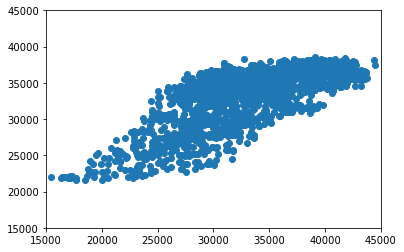

In [63]:
plt.scatter(y_test, y_pred)
plt.xlim(15000, 45000)
plt.ylim(15000, 45000)

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


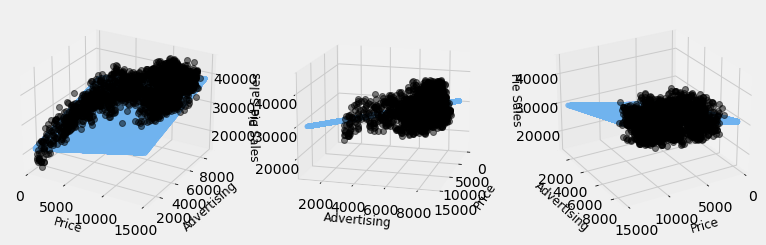

In [72]:
# Plot model visualization
# Create range for each dimension
xi = X_test.values[:, 0]
yi = X_test.values[:, 1]
zi = y_test.values.flatten()

xx_pred = xi
yy_pred = yi
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = regressor.predict(model_viz)

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(xi, yi, zi, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d

yukarıdaki yerden assumption testingi de yap yeni bir notebookta linear regression yaparak.